In [1]:
%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
import os
from matplotlib.colors import LogNorm
from scipy.stats import spearmanr
from scipy.stats import ttest_ind


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_json('1LU4A_3recycles_feats.json.zip')
metad = pd.read_csv('1LU4A_cluster_metadata.tsv',delimiter='\t')

df['cluster_ind'] = [os.path.basename(x.replace('.pdb','')).split('_')[-1] for x in df['pdb']]
metad['cluster_ind'] = ['%03d' % x for x in metad['cluster_ind']]

df = df.merge(metad, on='cluster_ind')

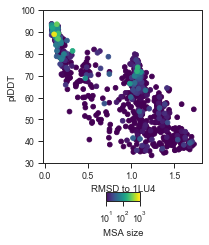

In [65]:
figure(figsize=(3,3.5))

df = df.sort_values('size')
scatter(df['rmsd_ref_1LU4A'], df['mean_pLDDT'], c=df['size'], cmap='viridis', norm=LogNorm(),vmin=10,vmax=1000)
colorbar(aspect=3.5,label='MSA size',fraction=0.05,orientation='horizontal',ticks=[1e1,1e2,1e3])
xlabel('RMSD to 1LU4')
ylabel('plDDT')
ylim([30,100])
tight_layout()
savefig('rmsd_vs_pLDDT.pdf',bbox_inches='tight')


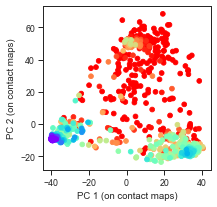

In [42]:
figure(figsize=(3,3))
df = df.sort_values('mean_pLDDT')
scatter(df['PC 1'], df['PC 2'], c=df['mean_pLDDT'], cmap='rainbow_r',vmin=50,vmax=90)
xlabel('PC 1 (on contact maps)')
ylabel('PC 2 (on contact maps)')
savefig('1LU4_plddt_landscape_3r.pdf',bbox_inches='tight')

In [4]:
 # get representative clusters of first and second state

state_1 = df.loc[df['PC 1']< -20][df['PC 2']<0] #[df['mean_pLDDT']>87.5]
print(len(state_1))

state_2 = df.loc[df['PC 1']> 20][df['PC 2']<0] #[df['mean_pLDDT']>87.5]
print(len(state_2))

bkgd = pd.concat([df.loc[df['PC 2']>0], df.loc[df['PC 2']<0][df['PC 1']>-20][df['PC 1']<30]])

383
383


/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_92376/3256561956.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  state_1 = df.loc[df['PC 1']< -20][df['PC 2']<0] #[df['mean_pLDDT']>87.5]
/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_92376/3256561956.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  state_2 = df.loc[df['PC 1']> 20][df['PC 2']<0] #[df['mean_pLDDT']>87.5]
/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_92376/3256561956.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bkgd = pd.concat([df.loc[df['PC 2']>0], df.loc[df['PC 2']<0][df['PC 1']>-20][df['PC 1']<30]])


In [8]:
print(' '.join([os.path.basename(x) for x in state_1.sort_values('mean_pLDDT',ascending=False).iloc[:5]['pdb']]))
print(' '.join([os.path.basename(x) for x in state_2.sort_values('mean_pLDDT',ascending=False).iloc[:5]['pdb']]))
    

1LU4A_323.pdb 1LU4A_1256.pdb 1LU4A_386.pdb 1LU4A_448.pdb 1LU4A_1367.pdb
1LU4A_123.pdb 1LU4A_1077.pdb 1LU4A_290.pdb 1LU4A_1438.pdb 1LU4A_042.pdb


Ttest_indResult(statistic=47.86945846786816, pvalue=1.0461570647518584e-235)
Ttest_indResult(statistic=23.735224027879752, pvalue=1.980893918480889e-94)


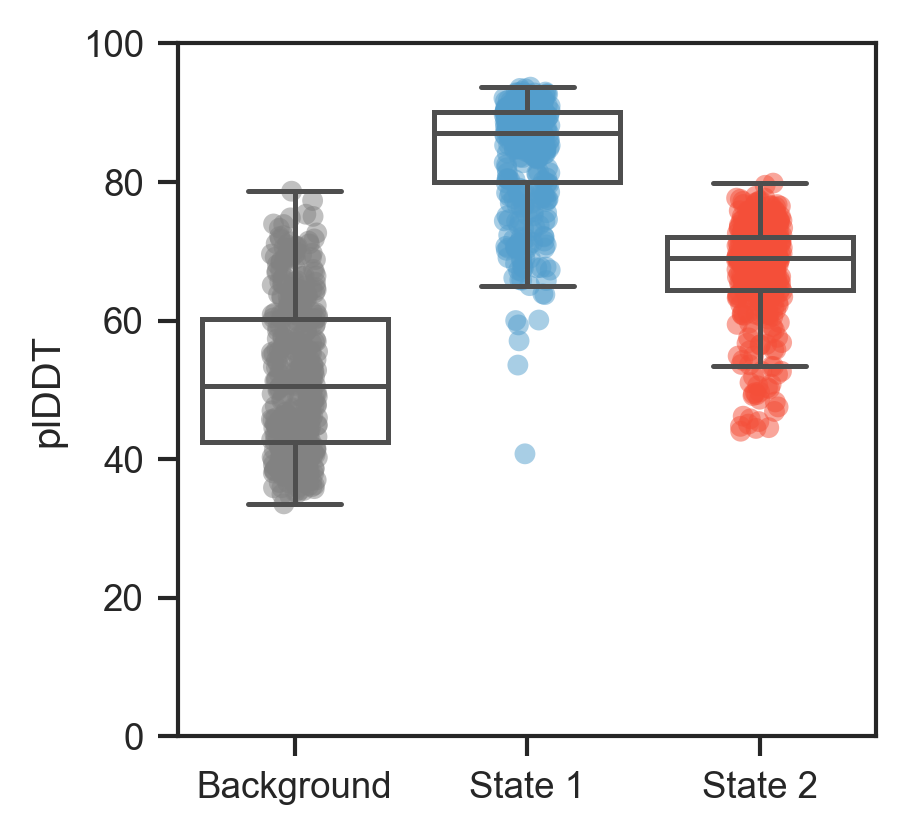

In [5]:
state_1['state'] = 'State 1'
state_2['state'] = 'State 2'
bkgd['state'] = 'Background'

df_w_states = pd.concat([state_1, state_2, bkgd])

blue = sns.color_palette('Blues')[-3]
red =  sns.color_palette('Reds')[-3]
grey= sns.color_palette('Greys')[-3]

def jitterbox(**kwargs):
    'supply x, y, hue, data'
    sns.stripplot(**kwargs, dodge=True, alpha=0.5,zorder=0)
    ax = sns.boxplot(**kwargs, dodge=True, fliersize=0, zorder=10, boxprops = dict(facecolor=(0,0,0,0)))

    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1, 1), frameon=False)
    
figure(figsize=(3,3))
jitterbox(x='state',y='mean_pLDDT', data=df_w_states, order=['Background', 'State 1', 'State 2'], palette=[grey, blue, red])
ylabel('plDDT')
ylim([0,100])
xlabel('')

savefig('1LU4_state_3R_plddts.pdf',bbox_inches='tight')

print(ttest_ind(state_1['mean_pLDDT'], bkgd['mean_pLDDT']))
print(ttest_ind(state_2['mean_pLDDT'], bkgd['mean_pLDDT']))

SpearmanrResult(correlation=0.19440143423119088, pvalue=0.00012884092082796612)
SpearmanrResult(correlation=0.07455661571751467, pvalue=0.14529310472543175)


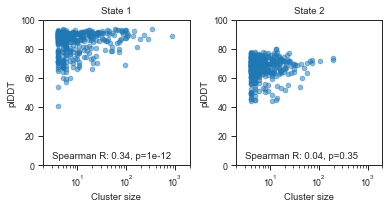

In [66]:
figure(figsize=(5.5,3))
subplot(1,2,1)
scatter(state_1['size'], state_1['mean_pLDDT'],alpha=0.5)
print(spearmanr(state_1['size'], state_1['mean_pLDDT']))
ylim([0,100])
xlabel('Cluster size')
ylabel('plDDT')
semilogx()
xlim([2,2e3])
text(3,5,'Spearman R: 0.34, p=1e-12')
title('State 1')

subplot(1,2,2)
scatter(state_2['size'], state_2['mean_pLDDT'],alpha=0.5)
print(spearmanr(state_2['size'], state_2['mean_pLDDT']))
title('State 2')
ylim([0,100])
semilogx()
xlabel('Cluster size')
ylabel('plDDT')
xlim([2,2e3])
text(3,5,'Spearman R: 0.04, p=0.35')

tight_layout()
savefig('cluster_size_vs_pLDDT_3R.png',dpi=300, bbox_inches='tight')

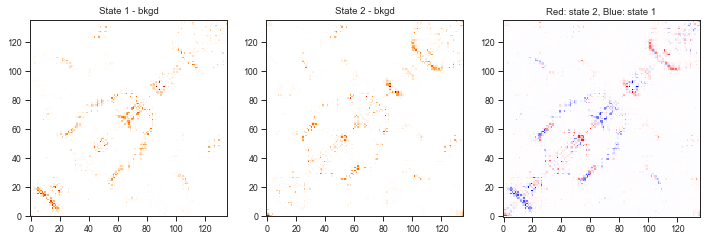

In [64]:
top_n_clusters=20


mats=[]
for _, row in bkgd.sort_values('mean_pLDDT',ascending=False)[:top_n_clusters].iterrows():
    tmp = np.loadtxt('msaT_preds/msa_t__1LU4A_%s.npy' % row['cluster_ind'])
    mats.append(tmp)

bkgd_mats = np.array(mats)

mats=[]
for _, row in state_1.sort_values('mean_pLDDT',ascending=False)[:top_n_clusters].iterrows():
    tmp = np.loadtxt('msaT_preds/msa_t__1LU4A_%s.npy' % row['cluster_ind'])
    mats.append(tmp)

mats1 = np.array(mats)

figure(figsize=(12,4))

subplot(1,3,1)
imshow(np.mean(mats1, axis=0)-np.mean(bkgd_mats, axis=0),cmap='gist_heat_r',origin='lower left',vmin=0,vmax=0.5)

title('State 1 - bkgd')
subplot(1,3,2)

mats=[]
for _, row in state_2.sort_values('mean_pLDDT',ascending=False)[:top_n_clusters].iterrows():
    tmp = np.loadtxt('msaT_preds/msa_t__1LU4A_%s.npy' % row['cluster_ind'])
    mats.append(tmp)
    
title('State 2 - bkgd')

mats2 = np.array(mats)
imshow(np.mean(mats2, axis=0)-np.mean(bkgd_mats, axis=0),cmap='gist_heat_r',origin='lower left',vmin=0,vmax=0.5)

subplot(1,3,3)
title('Red: state 2, Blue: state 1')
imshow(np.mean(mats2, axis=0)-np.mean(mats1, axis=0),cmap='seismic',origin='lower left',vmin=-0.5,vmax=0.5)
#colorbar()